In [ ]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import tree

1.) Loading the datasetand perform necessary EDAs

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Ml_Eval_2/Set_2.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df=df.drop('Unnamed: 32',axis=1)

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Scatter Plot

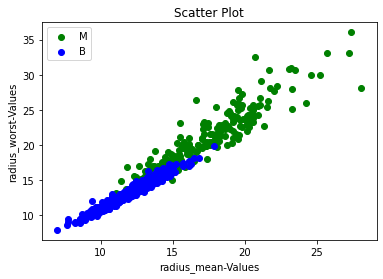

In [ ]:
df1=df[df['diagnosis']=='M']
df2=df[df['diagnosis']=='B']

plt.scatter(df1['radius_mean'],df1['radius_worst'],color= 'green', label='M')
plt.scatter(df2['radius_mean'],df2['radius_worst'],color='blue', label='B')

plt.xlabel('radius_mean-Values')
plt.ylabel('radius_worst-Values')
plt.title("Scatter Plot")
plt.legend()
plt.show()

we can know the range of x and y values of all classes

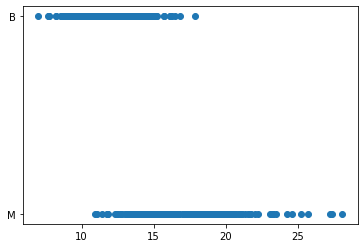

In [ ]:
plt.scatter(df['radius_mean'],df['diagnosis'])

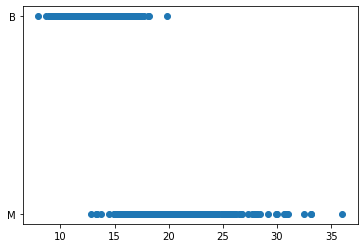

In [ ]:
plt.scatter(df['radius_worst'],df['diagnosis'])

Correlation

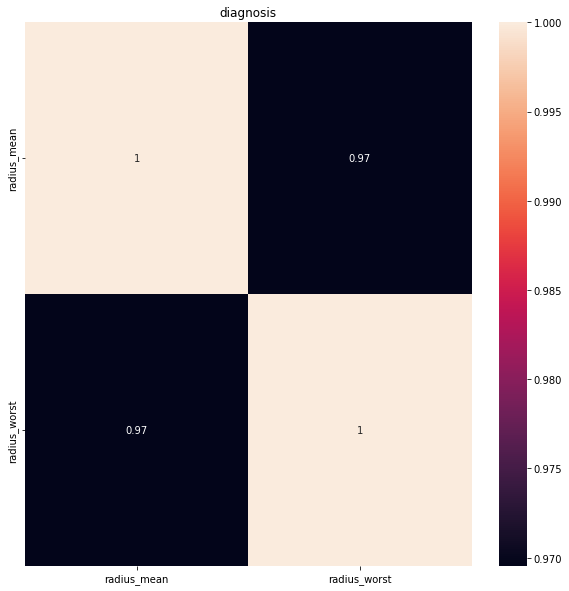

In [ ]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df[['radius_mean',"radius_worst"]].corr()[['radius_mean',"radius_worst"]],cbar=True,annot=True,)
heatmap.set_title('diagnosis');

Model Building

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [ ]:
# Split the dataset into test (20%) and train (80%)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
# Build an SVM-based classifier
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred1 = svc.predict(X_test)
y_pred1

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

In [ ]:
# Train the models on the dataset's train split and disply their accuracy scores.
print("Accuracy of svc:",accuracy_score(y_test,y_pred1))

Accuracy of svc: 0.6491228070175439


In [ ]:
# Decision Tree
from sklearn import tree
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
y_pred2 = tr.predict(X_test)
y_pred2

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B'], dtype=object)

In [ ]:
# Train the models on the dataset's train split and disply their accuracy scores.
print("Accuracy of Decision tree:",accuracy_score(y_test,y_pred2))

Accuracy of Decision tree: 0.8947368421052632


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_test)
y_pred3

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B'], dtype=object)

In [ ]:
# Train the models on the dataset's train split and disply their accuracy scores.
print("Accuracy of Random forest:",accuracy_score(y_test,y_pred3))

Accuracy of Random forest: 0.9298245614035088


[Text(0.5625, 0.9375, 'concave points_mean <= 0.056\ngini = 0.47\nsamples = 455\nvalue = [283, 172]\nclass = M'),
 Text(0.3942307692307692, 0.8125, 'perimeter_worst <= 116.25\ngini = 0.113\nsamples = 284\nvalue = [267, 17]\nclass = M'),
 Text(0.28846153846153844, 0.6875, 'perimeter_worst <= 107.2\ngini = 0.057\nsamples = 272\nvalue = [264, 8]\nclass = M'),
 Text(0.19230769230769232, 0.5625, 'radius_se <= 0.91\ngini = 0.024\nsamples = 252\nvalue = [249, 3]\nclass = M'),
 Text(0.15384615384615385, 0.4375, 'smoothness_se <= 0.003\ngini = 0.016\nsamples = 251\nvalue = [249, 2]\nclass = M'),
 Text(0.07692307692307693, 0.3125, 'texture_worst <= 27.755\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = M'),
 Text(0.038461538461538464, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = M'),
 Text(0.11538461538461539, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = B'),
 Text(0.23076923076923078, 0.3125, 'texture_worst <= 33.35\ngini = 0.008\nsamples = 245\nvalue = [244, 1]\nc

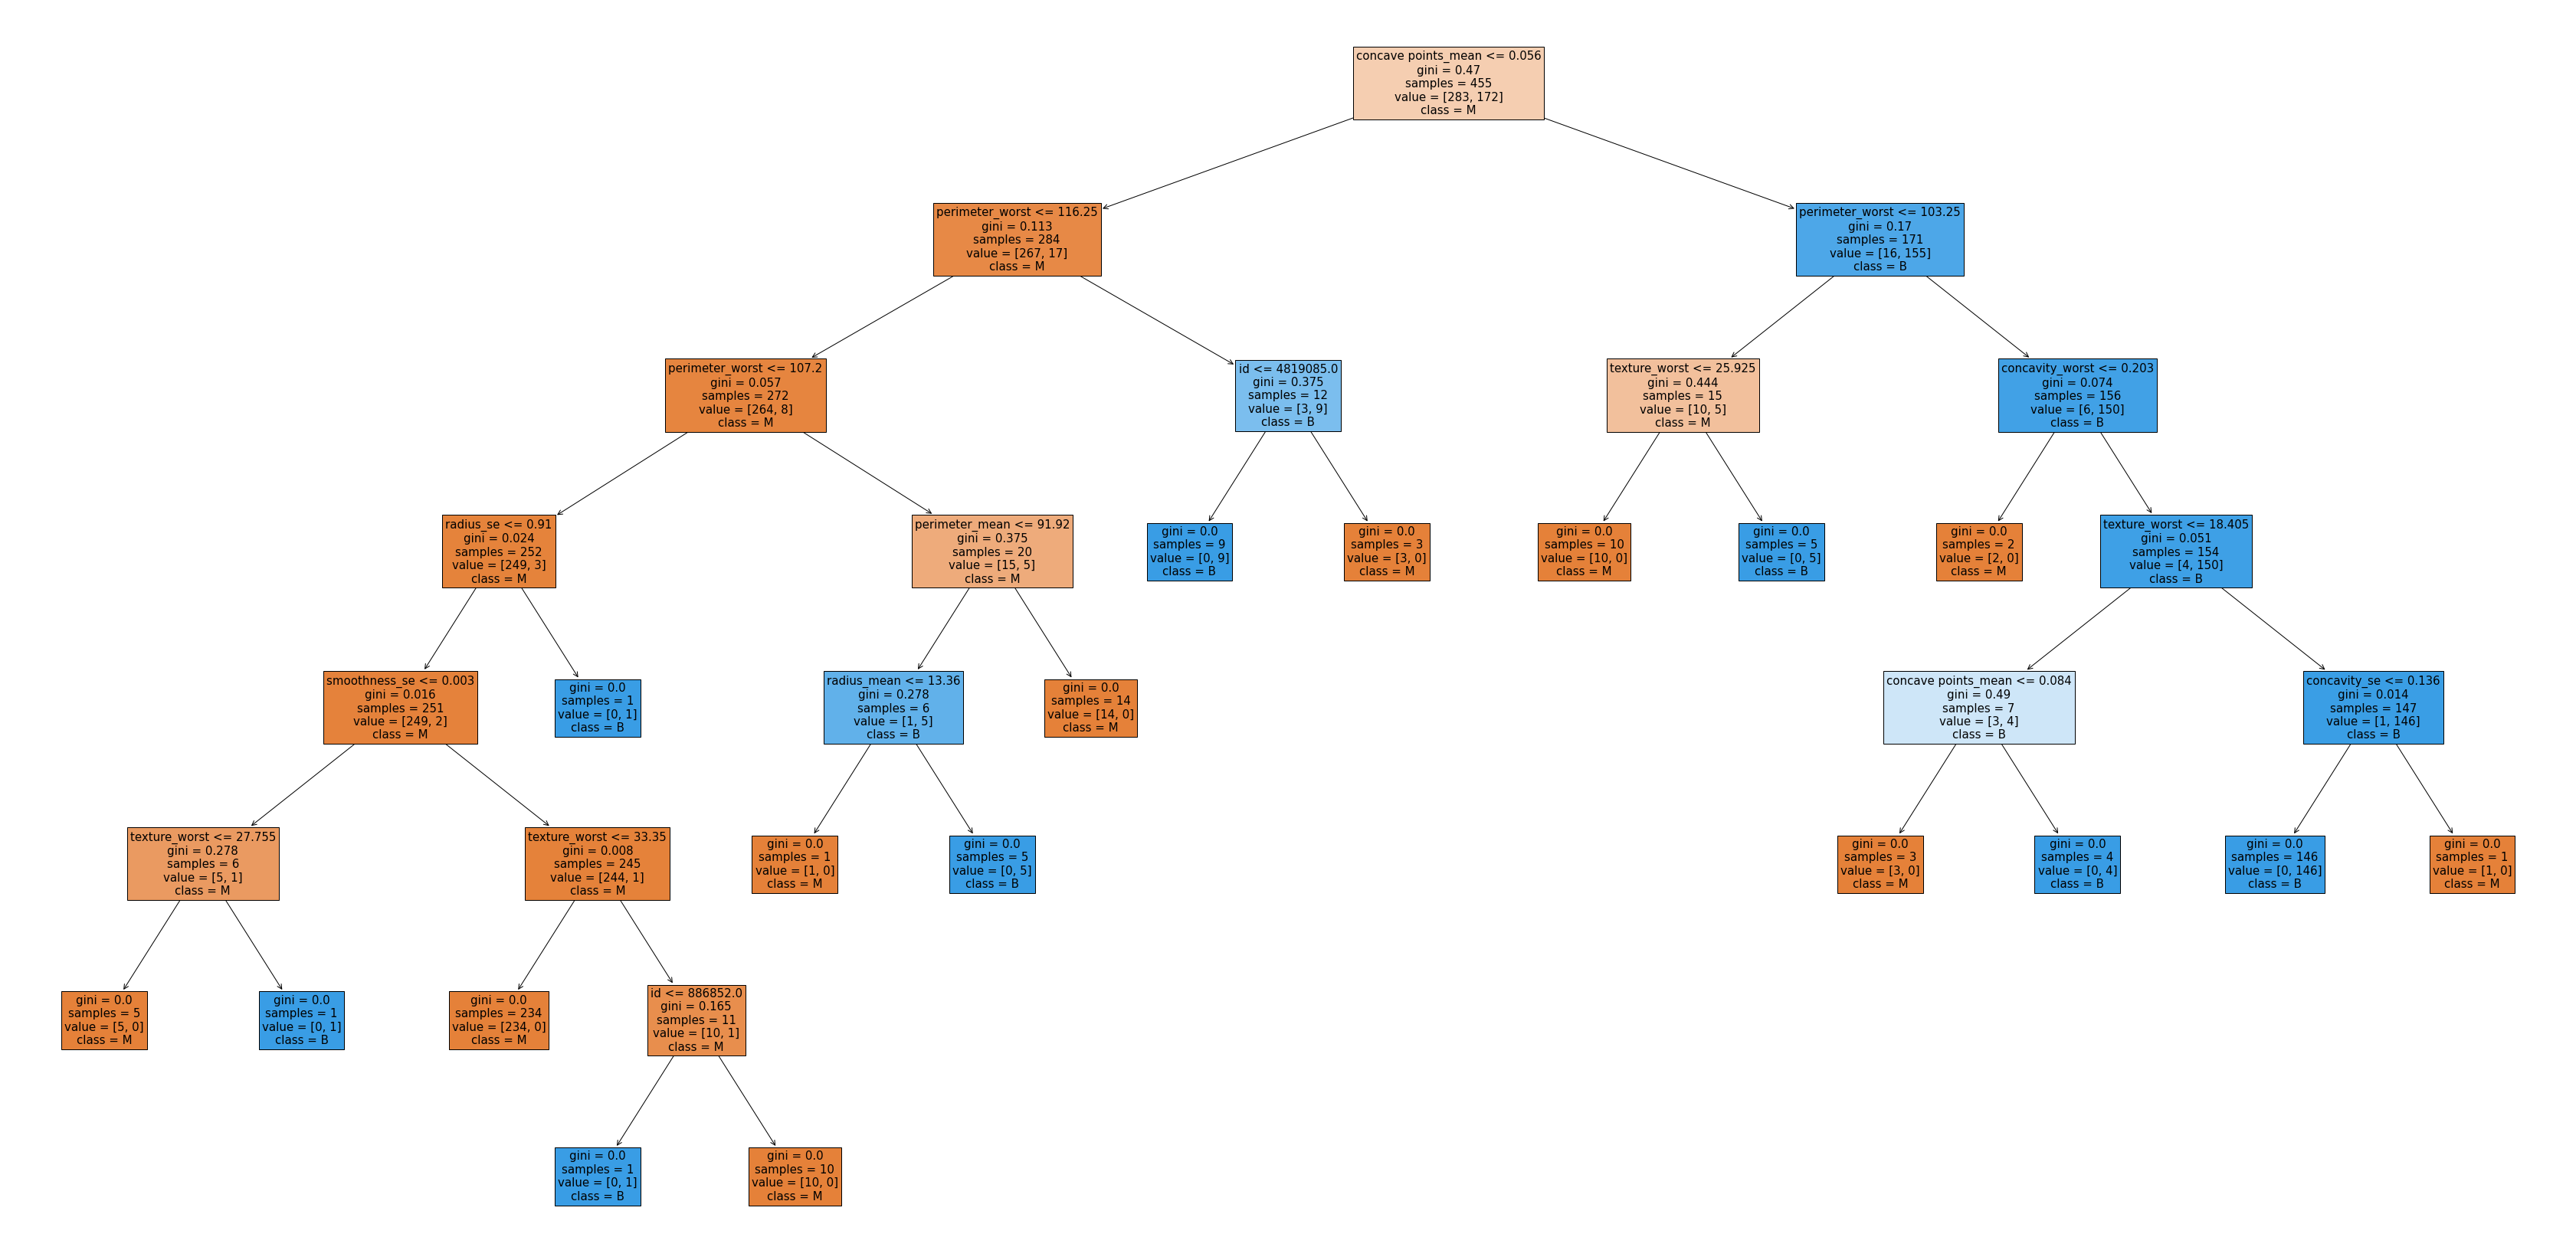

In [ ]:
plt.figure(figsize=(60,30))
plot_tree(tr,class_names=['M','B'],feature_names=X.columns, filled=True,fontsize=15)

In [ ]:
print("SVM")
print(classification_report(y_test, y_pred1))
print("Decision tree")
print(classification_report(y_test, y_pred2))
print("Random forest")
print(classification_report(y_test, y_pred3))

SVM
              precision    recall  f1-score   support

           B       0.65      1.00      0.79        74
           M       0.00      0.00      0.00        40

    accuracy                           0.65       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.42      0.65      0.51       114

Decision tree
              precision    recall  f1-score   support

           B       0.87      0.99      0.92        74
           M       0.97      0.72      0.83        40

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114

Random forest
              precision    recall  f1-score   support

           B       0.90      1.00      0.95        74
           M       1.00      0.80      0.89        40

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.9

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("SVM")
print(confusion_matrix(y_test, y_pred1))
print("Decision tree")
print(confusion_matrix(y_test, y_pred2))
print("Random forest")
print(confusion_matrix(y_test, y_pred3))

SVM
[[74  0]
 [40  0]]
Decision tree
[[73  1]
 [11 29]]
Random forest
[[74  0]
 [ 8 32]]
